In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score
%matplotlib inline
#Imports

In [200]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [201]:
train['Exter Qual'].value_counts()

TA    1247
Gd     697
Ex      81
Fa      26
Name: Exter Qual, dtype: int64

In [202]:
Exter_dict = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
Lot_dict = {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3}
Bsmt_dict = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
Bsmt_ex_dict = {'NA': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
Func_dict = {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 
             'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7}
Fence_dict = {'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

train['Exter Qual'].replace(Exter_dict, inplace = True)
test['Exter Qual'].replace(Exter_dict, inplace = True)

train['Exter Cond'].replace(Exter_dict, inplace = True)
test['Exter Cond'].replace(Exter_dict, inplace = True)

train['Heating QC'].replace(Exter_dict, inplace = True)
test['Heating QC'].replace(Exter_dict, inplace = True)

train['Kitchen Qual'].replace(Exter_dict, inplace = True)
test['Kitchen Qual'].replace(Exter_dict, inplace = True)

train['Bsmt Qual'].replace(Bsmt_dict, inplace = True)
test['Bsmt Qual'].replace(Bsmt_dict, inplace = True)

train['Bsmt Cond'].replace(Bsmt_dict, inplace = True)
test['Bsmt Cond'].replace(Bsmt_dict, inplace = True)

train['Bsmt Exposure'].replace(Bsmt_ex_dict, inplace = True)
test['Bsmt Exposure'].replace(Bsmt_ex_dict, inplace = True)

train['Functional'].replace(Func_dict, inplace = True)
test['Functional'].replace(Func_dict, inplace = True)

train['Fireplace Qu'].replace(Bsmt_dict, inplace = True)
test['Fireplace Qu'].replace(Bsmt_dict, inplace = True)

train['Garage Qual'].replace(Bsmt_dict, inplace = True)
test['Garage Qual'].replace(Bsmt_dict, inplace = True)

train['Garage Cond'].replace(Bsmt_dict, inplace = True)
test['Garage Cond'].replace(Bsmt_dict, inplace = True)

train['Pool QC'].replace(Bsmt_dict, inplace = True)
test['Pool QC'].replace(Bsmt_dict, inplace = True)

train['Fence'].replace(Fence_dict, inplace = True)
test['Fence'].replace(Fence_dict, inplace = True)

train['Lot Shape'].replace(Lot_dict, inplace = True)
test['Lot Shape'].replace(Lot_dict, inplace = True)




In [203]:
nas = ['Garage Yr Blt', 'Total Bsmt SF', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond',
 'Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin SF 1','BsmtFin SF 2',
 'Bsmt Unf SF','Mas Vnr Area', 'Pool QC', 'Lot Frontage', 'Fireplace Qu']

for n in nas:
    train[n].fillna(0, inplace = True)
    test[n].fillna(0, inplace = True)


In [204]:
dummy_vars = ['Exterior 1st','House Style', 'Central Air', 'Foundation']

In [205]:
train['Foundation'].value_counts()

PConc     926
CBlock    863
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: Foundation, dtype: int64

In [206]:
train = pd.get_dummies(train, columns = dummy_vars)
test = pd.get_dummies(test, columns = dummy_vars)

In [207]:
features_init = [c for c in train._get_numeric_data().columns if not c in ['SalePrice']]

In [208]:
features_init

['Lot Frontage',
 'Lot Area',
 'Lot Shape',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating QC',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Pool QC',
 'Fence',
 'Yr Sold',
 'Exterior 1st_AsbShng',
 'Exterior 1st_AsphShn',
 'Exterior 1st_BrkComm',
 'Exterior 1st_BrkFace',
 'Exterior 1st_CBlock',
 'Exterior 1st_CemntBd',
 'Exterior 1st_HdBoard',
 'Exterior 1st_ImStucc',
 'Exterior 1st_MetalSd',
 'Exterior 1st_Plywood

# Creating some interaction terms

In [209]:
train['Garage_Total'] = train['Garage Yr Blt'] * train['Garage Cars'] * train['Garage Area'] * train['Garage Qual'] * train['Garage Cond']
test['Garage_Total'] = train['Garage Yr Blt'] * train['Garage Cars'] * train['Garage Area'] * train['Garage Qual'] * train['Garage Cond']

In [210]:
train['Bsmt_Total'] = train['Bsmt Qual'] * train['Bsmt Cond'] * train['Bsmt Exposure'] * train['Total Bsmt SF']
test['Bsmt_Total'] = train['Bsmt Qual'] * train['Bsmt Cond'] * train['Bsmt Exposure'] * train['Total Bsmt SF']

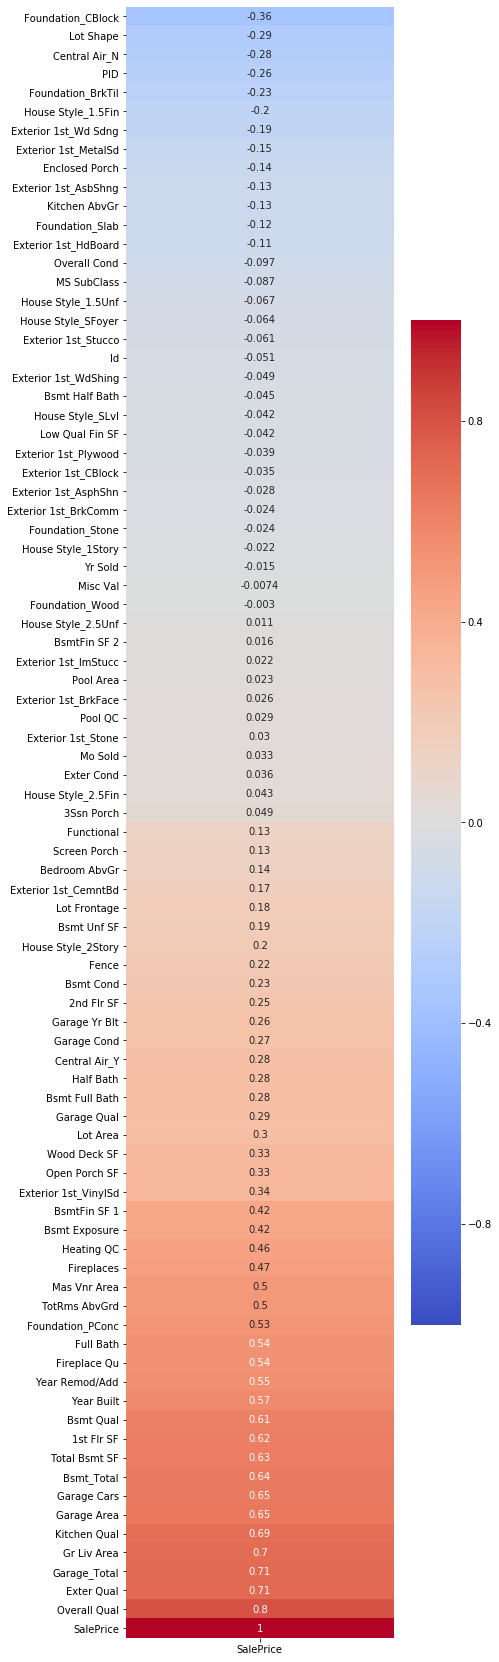

In [211]:
plt.figure(figsize = (6,30))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice'), vmin = -1, annot = True, cmap = 'coolwarm')

In [251]:
features = [
    'Overall Qual',
    'Exter Qual', 
    'Garage_Total',
    'Bsmt_Total',
    'Gr Liv Area',
    'Kitchen Qual',
    '1st Flr SF',
    'Year Built',
    'Year Remod/Add',
    'Mas Vnr Area',
    'TotRms AbvGrd',
    'Fireplaces',
    'Heating QC',
    'BsmtFin SF 1',
    'Pool QC',
    'Lot Frontage',
    'Open Porch SF',
    'Wood Deck SF',
    'Fireplace Qu',
    'Lot Area',
    'Lot Shape'
]

In [252]:
dummy_features = ['House Style_1.5Fin', 
            'House Style_1.5Unf', 
            'House Style_2.5Fin', 
            'House Style_2.5Unf', 
            'House Style_2Story',
            'House Style_SFoyer', 
            'House Style_SLvl',
            'Central Air_N',
            'Exterior 1st_MetalSd',
            'Exterior 1st_HdBoard', 
            'Exterior 1st_Wd Sdng', 
            'Exterior 1st_Plywood',
            'Exterior 1st_CemntBd', 
            'Exterior 1st_BrkFace', 
            'Exterior 1st_WdShing', 
            'Exterior 1st_AsbShng', 
            'Exterior 1st_Stucco', 
            'Exterior 1st_BrkComm',  
            'Exterior 1st_AsphShn',
            'Foundation_CBlock', 
            'Foundation_BrkTil', 
            'Foundation_Slab', 
            'Foundation_Stone', 
            'Foundation_Wood']
#features += dummy_features
#Same thing happened here as in attempt 2

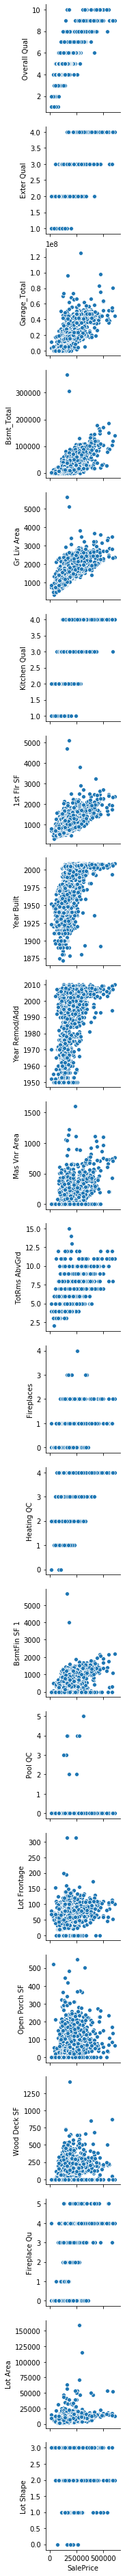

In [253]:
sns.pairplot(train, y_vars = features, x_vars = 'SalePrice')

# Model Time

In [254]:
X = train[features]
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [255]:
X.isnull().sum()

Overall Qual      0
Exter Qual        0
Garage_Total      0
Bsmt_Total        0
Gr Liv Area       0
Kitchen Qual      0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Mas Vnr Area      0
TotRms AbvGrd     0
Fireplaces        0
Heating QC        0
BsmtFin SF 1      0
Pool QC           0
Lot Frontage      0
Open Porch SF     0
Wood Deck SF      0
Fireplace Qu      0
Lot Area          0
Lot Shape         0
dtype: int64

In [256]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test) #NOTICE No fitting happened here

In [257]:
model_lr = LinearRegression()
model_ridge = RidgeCV()
model_lasso = LassoCV(cv = 5)

In [258]:
cross_val_score(model_lr, X_train_sc, y_train, cv = 5).mean()

0.7753583828599196

In [259]:
cross_val_score(model_ridge, X_train_sc, y_train, cv = 5).mean()

0.77674265981486

In [260]:
cross_val_score(model_lasso, X_train_sc, y_train, cv = 5).mean()

0.7797941861357496

In [261]:
model_lasso.fit(X_train_sc, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [262]:
model_lasso.score(X_train_sc, y_train)

0.8217839063884262

In [263]:
model_lasso.score(X_test_sc, y_test)

0.8756253743593183

In [264]:
def r2_adj(r2,X):
    return 1 - ((1-r2)*(len(X)-1))/(len(X)-len(X.columns)-1)

def print_metrics(model_pass, X_pass,y_pass ):
    residual = model_pass.predict(X_pass) - y_pass
    print(f"Mean squared error: {(residual**2).mean()}")
    r2 = model_pass.score(X_pass, y_pass)
    print(f"R Squared value: {r2}")
    print(f"Adjusted R Squared Value: {r2_adj(r2, X)}")
    print(f"Root mean squared error: {np.sqrt((residual**2).mean())}")
    print(f'Residual sum of squares: {(residual**2).sum()}')
    print(f"Residual mean: {residual.mean()}")

In [265]:
print_metrics(model_lasso, X_train_sc, y_train)

Mean squared error: 1127131288.77743
R Squared value: 0.8217839063884262
Adjusted R Squared Value: 0.8199393829947136
Root mean squared error: 33572.776006422675
Residual sum of squares: 1733527922139.6865
Residual mean: 4.210404601185468e-12


In [266]:
print_metrics(model_lasso, X_test_sc, y_test)

Mean squared error: 763663277.2569492
R Squared value: 0.8756253743593183
Adjusted R Squared Value: 0.87433810617871
Root mean squared error: 27634.458150232458
Residual sum of squares: 391759261232.8147
Residual mean: 190.15778948154292


In [267]:
y_pred = model_lasso.predict(X_test_sc)

In [268]:
residuals = y_test - y_pred

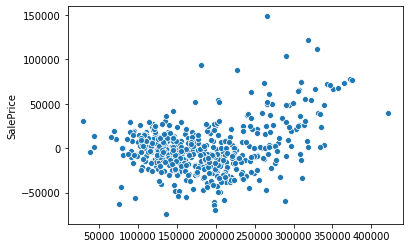

In [269]:
sns.scatterplot(y_pred, residuals)

(array([ 2.,  5.,  8., 14., 24., 44., 68., 93., 76., 70., 35., 29., 11.,
         7.,  7.,  7.,  6.,  1.,  2.,  0.,  2.,  1.,  0.,  0.,  1.]),
 array([-74094.3680435 , -65188.27666129, -56282.18527909, -47376.09389688,
        -38470.00251467, -29563.91113246, -20657.81975025, -11751.72836804,
         -2845.63698583,   6060.45439638,  14966.54577858,  23872.63716079,
         32778.728543  ,  41684.81992521,  50590.91130742,  59497.00268963,
         68403.09407184,  77309.18545404,  86215.27683625,  95121.36821846,
        104027.45960067, 112933.55098288, 121839.64236509, 130745.7337473 ,
        139651.82512951, 148557.91651171]),
 <a list of 25 Patch objects>)

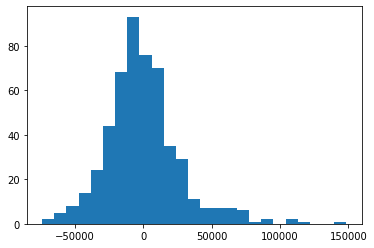

In [270]:
plt.hist(residuals, bins = 25)

# Trying to regularize the y variable

In [271]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [272]:
model_lasso.fit(X_train_sc, y_train_log)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [273]:
model_lasso.score(X_train_sc, y_train_log)

0.8402181612871551

In [274]:
model_lasso.score(X_test_sc, y_test_log)

0.8424282522380402

In [275]:
cross_val_score(model_lasso, X_train_sc, y_train_log, cv = 5).mean()

0.8164891454472043

In [276]:
y_pred_log = np.exp(model_lasso.predict(X_test_sc))

In [277]:
residual_log = y_test - y_pred_log

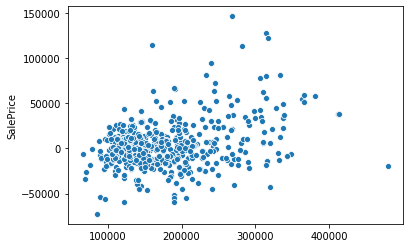

In [278]:
sns.scatterplot(y_pred_log, residual_log)

In [279]:
r2_score(y_test, y_pred_log)

0.8866368758211828

In [280]:
X_test_real = test[features]

In [281]:
Z_ss_test_test = pd.DataFrame(ss.fit_transform(X_test_real))

In [282]:
y_pred_final = np.exp(model_lasso.predict(Z_ss_test_test))

In [283]:
y_pred_final.shape

(879,)

In [284]:
test['SalePrice'] = y_pred_final

In [285]:
submission = test[['Id', 'SalePrice']]

In [286]:
submission.to_csv("Submission4.csv", index = False)